In [1]:
import pandas as pd
df = pd.read_csv('KNNAlgorithmDataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# Display the count
num_rows = len(df)
print(f"Total number of patient: {num_rows}")
#df.count()

Total number of patient: 569


In [3]:
# Display the column (categories)
num_column = df.shape[1]
print(f"Total number of categories: {num_column}")

Total number of categories: 33


In [4]:
# Check data types of each column
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(columns=["Unnamed: 32"])

In [7]:
# Check data drop the column or not
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Group by 'Category' and count
grouped_count = df.groupby('diagnosis').size().reset_index(name='Count')

print(grouped_count)

  diagnosis  Count
0         B    357
1         M    212


In [33]:
# Method 1: Square root of the data size
N = len(df)  # data size
optimal_k_sqrt = round(np.sqrt(N))
print(f"Optimal K from square root method: {optimal_k_sqrt}")

Optimal K from square root method: 24


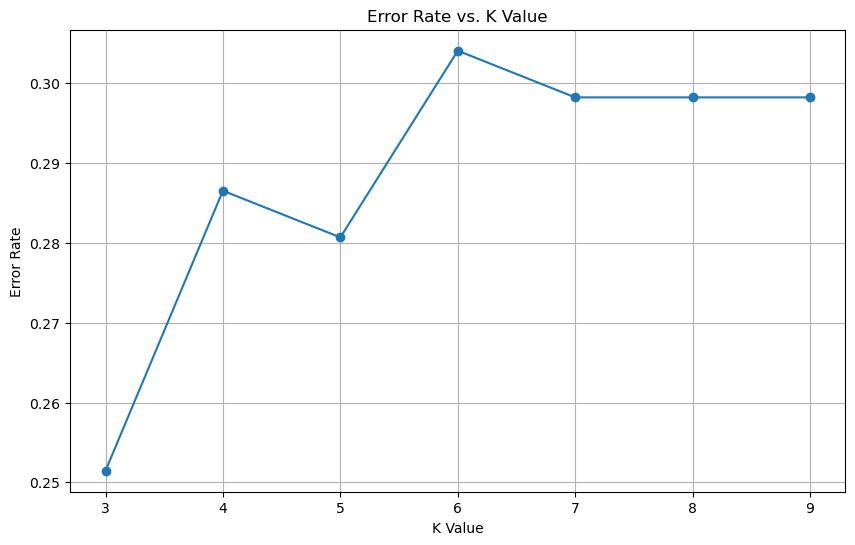

Optimal K from error plot: 3


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# target variable is in the second column (index 1)
X = df.drop(df.columns[1], axis=1)  # Features (all columns except the second)
y = df.iloc[:, 1]                    # Target (second column)

# Method 2: Error plot
k_values = range(3, 10)
errors = []

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = 1 - accuracy_score(y_test, predictions)
    errors.append(error)

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()

# Identify the optimal K from the plot
optimal_k_plot = k_values[np.argmin(errors)]
print(f"Optimal K from error plot: {optimal_k_plot}")


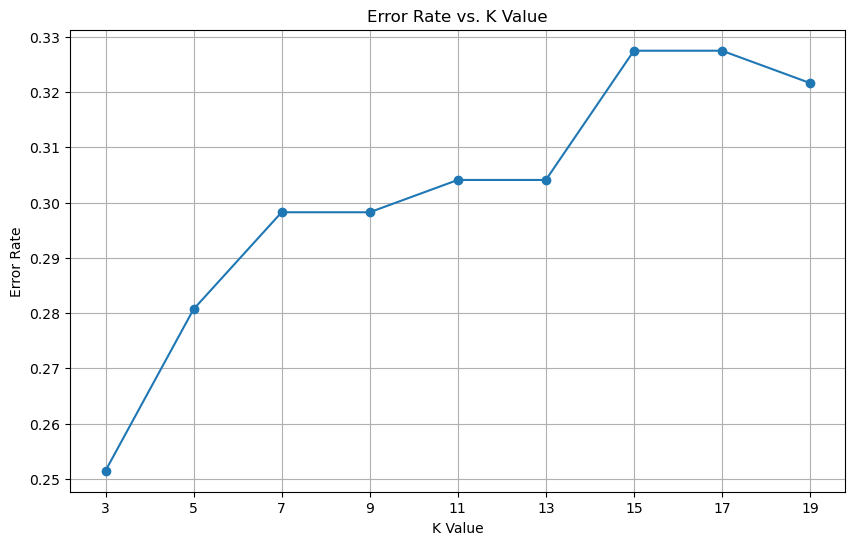

Optimal K from error plot: 3


In [16]:
# Method 2: Error plot find odd numbers
k_values = range(3, 21, 2)
errors = []

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = 1 - accuracy_score(y_test, predictions)
    errors.append(error)

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()

# Identify the optimal K from the plot
optimal_k_plot = k_values[np.argmin(errors)]
print(f"Optimal K from error plot: {optimal_k_plot}")

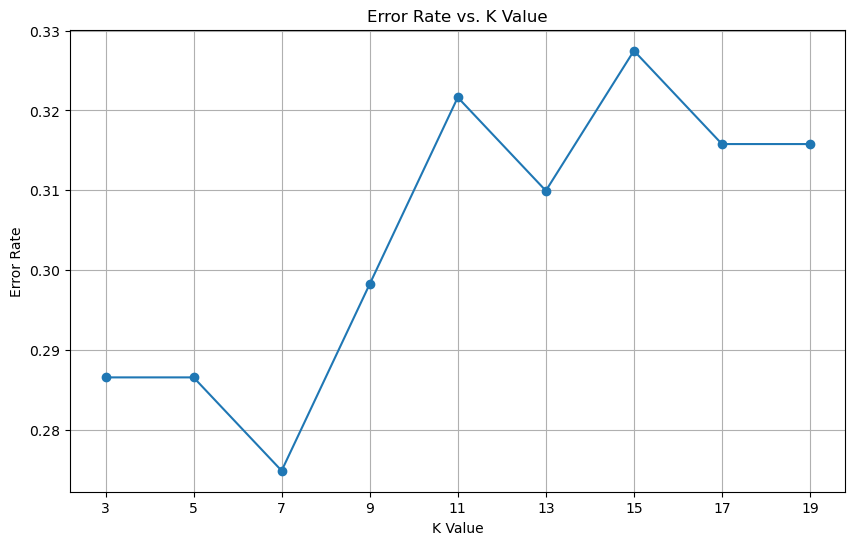

Optimal K from error plot: 7


In [18]:
# Method 2: Error plot find odd numbers
k_values = range(3, 21,2)
errors = []

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = 1 - accuracy_score(y_test, predictions)
    errors.append(error)

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()

# Identify the optimal K from the plot
optimal_k_plot = k_values[np.argmin(errors)]
print(f"Optimal K from error plot: {optimal_k_plot}")

Optimal K from square method: 24
Classification Report:
              precision    recall  f1-score   support

           B       0.67      0.95      0.79       108
           M       0.72      0.21      0.32        63

    accuracy                           0.68       171
   macro avg       0.70      0.58      0.56       171
weighted avg       0.69      0.68      0.62       171

Confusion Matrix:


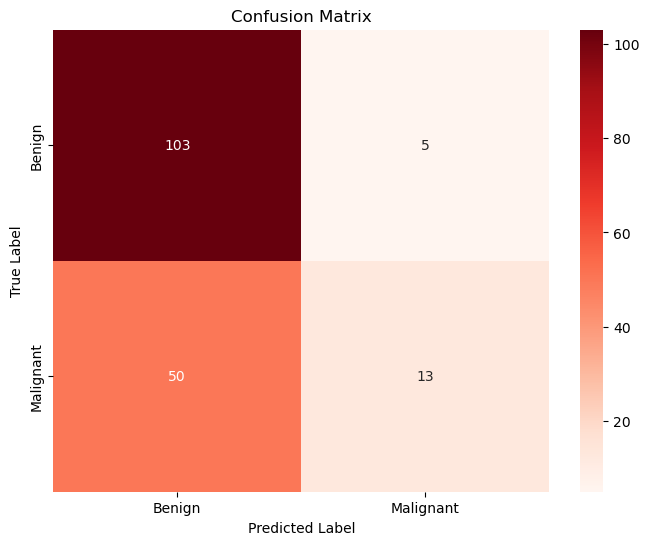

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set the optimal K = 24 from the sqaure root method
optimal_k_plot = 24
print(f"Optimal K from square method: {optimal_k_plot}")

# Final model evaluation with optimal K
final_model = KNeighborsClassifier(n_neighbors=optimal_k_plot)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

# Display evaluation metrics
print("Classification Report:")
print(classification_report(y_test, final_predictions))

print("Confusion Matrix:")

# Create confusion matrix
cm = confusion_matrix(y_test, final_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Optimal K from error plot: 3
Classification Report:
              precision    recall  f1-score   support

           B       0.74      0.94      0.82       108
           M       0.79      0.43      0.56        63

    accuracy                           0.75       171
   macro avg       0.77      0.68      0.69       171
weighted avg       0.76      0.75      0.73       171

Confusion Matrix:


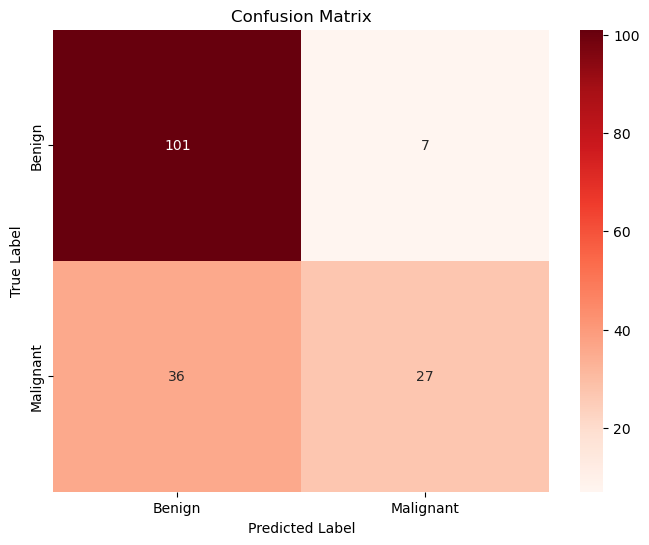

In [40]:
# Set the optimal K = 3 from the error plot method (random_state = 0)
optimal_k_plot = 3
print(f"Optimal K from error plot: {optimal_k_plot}")

# Final model evaluation with optimal K
final_model = KNeighborsClassifier(n_neighbors=optimal_k_plot)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

# Display evaluation metrics
print("Classification Report:")
print(classification_report(y_test, final_predictions))

print("Confusion Matrix:")
# Create confusion matrix
cm = confusion_matrix(y_test, final_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Optimal K from error plot: 7
Classification Report:
              precision    recall  f1-score   support

           B       0.69      0.95      0.80       108
           M       0.77      0.27      0.40        63

    accuracy                           0.70       171
   macro avg       0.73      0.61      0.60       171
weighted avg       0.72      0.70      0.65       171

Confusion Matrix:


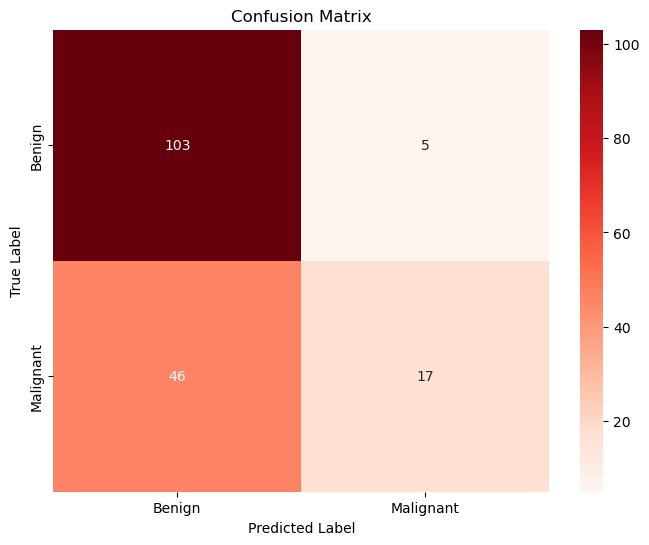

In [41]:
# Set the optimal K = 3 from the error plot method (random_state = 42)

optimal_k_plot = 7
print(f"Optimal K from error plot: {optimal_k_plot}")

# Final model evaluation with optimal K
final_model = KNeighborsClassifier(n_neighbors=optimal_k_plot)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

# Display evaluation metrics
print("Classification Report:")
print(classification_report(y_test, final_predictions))

print("Confusion Matrix:")
# Create confusion matrix
cm = confusion_matrix(y_test, final_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
